다음 데이터에 대해서 SVM을 적용하여 분류 과제를 진행해 주세요.  
조별로 SVM에서 적용하는 kernel은, poly, rbf, sigmoid 중 하나를 맡아서 사용합니다.  
sklearn.svm.SVC 함수에서 C와 gamma를 변경하여 accuracy와 과대적합에 미치는 영향을 시각화하고 논의하세요.  

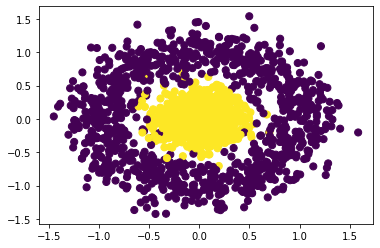

In [2]:
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_circles
import matplotlib.pyplot as plt

X, y = make_circles(n_samples = 2000, noise = 0.2, factor = 0.05, random_state=2021)
plt.scatter(X[:,0], X[:,1], c = y, s = 50)
plt.show()

In [3]:
print(X)

[[ 1.06953502 -0.59282839]
 [-1.27305672  0.30487838]
 [ 0.73675397  0.93956697]
 ...
 [ 0.56713319  0.56544807]
 [ 0.19357062  0.16320168]
 [ 0.30537165 -0.14837143]]


In [4]:
print(y)

[0 0 0 ... 0 1 1]


In [5]:
clf = SVC(kernel='sigmoid')

In [6]:
clf.get_params()

{'C': 1.0,
 'break_ties': False,
 'cache_size': 200,
 'class_weight': None,
 'coef0': 0.0,
 'decision_function_shape': 'ovr',
 'degree': 3,
 'gamma': 'scale',
 'kernel': 'sigmoid',
 'max_iter': -1,
 'probability': False,
 'random_state': None,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

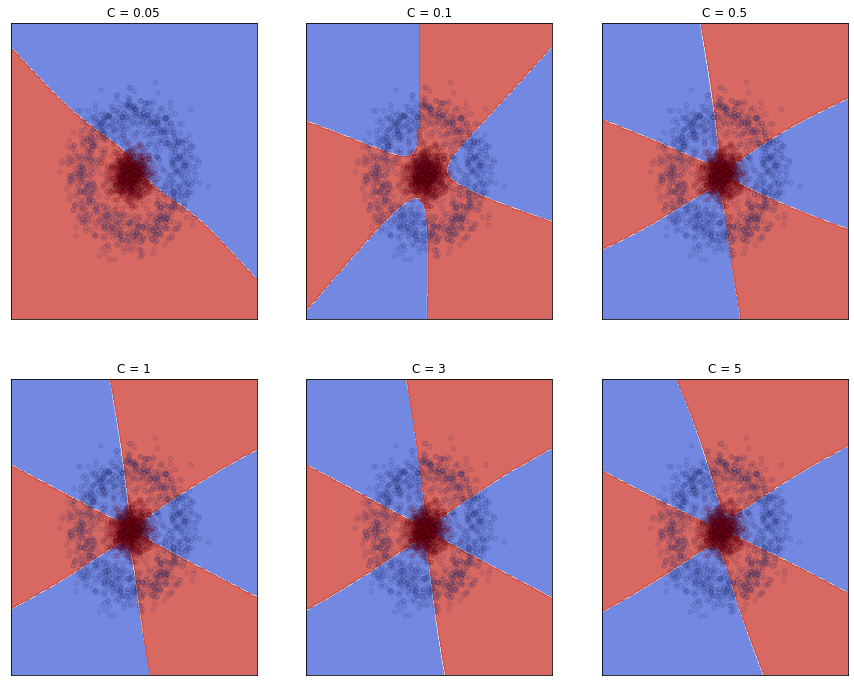

accurracy when C = 0.05: 0.6315
accurracy when C = 0.1: 0.698
accurracy when C = 0.5: 0.6425
accurracy when C = 1: 0.6025
accurracy when C = 3: 0.537
accurracy when C = 5: 0.5045


In [25]:
import numpy as np
from sklearn import svm, datasets
from sklearn.metrics import accuracy_score

accuracy_C = {}

def make_meshgrid(x, y, h=.02):
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    return xx, yy

def plot_contours(ax, clf, xx, yy, **params):
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out

models = (SVC(kernel='sigmoid', C=0.05),
          SVC(kernel='sigmoid', C=0.1),
          SVC(kernel='sigmoid', C=0.5),
          SVC(kernel='sigmoid', C=1),
          SVC(kernel='sigmoid', C=3),
          SVC(kernel='sigmoid', C=5))
models = (clf.fit(X, y) for clf in models)

# title for the plots
titles = ('C = 0.05', 'C = 0.1', 'C = 0.5', 'C = 1', 'C = 3', 'C = 5')

# Set-up 2x2 grid for plotting.
fig, sub = plt.subplots(2, 3, figsize=(15,12))

X0, X1 = X[:, 0], X[:, 1]
xx, yy = make_meshgrid(X0, X1)

for clf, title, ax in zip(models, titles, sub.flatten()):
    plot_contours(ax, clf, xx, yy,
                  cmap=plt.cm.coolwarm, alpha=0.8)
    accuracy_C[title] = accuracy_score(y, clf.predict(X))
    ax.scatter(X0, X1, c=y, cmap=plt.cm.coolwarm, s=20, edgecolors='k', alpha=0.1)
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xticks(())
    ax.set_yticks(())
    ax.set_title(title)

plt.show()

for key in accuracy_C:
    print('accurracy when {}: {}'.format(key, accuracy_C[key]))

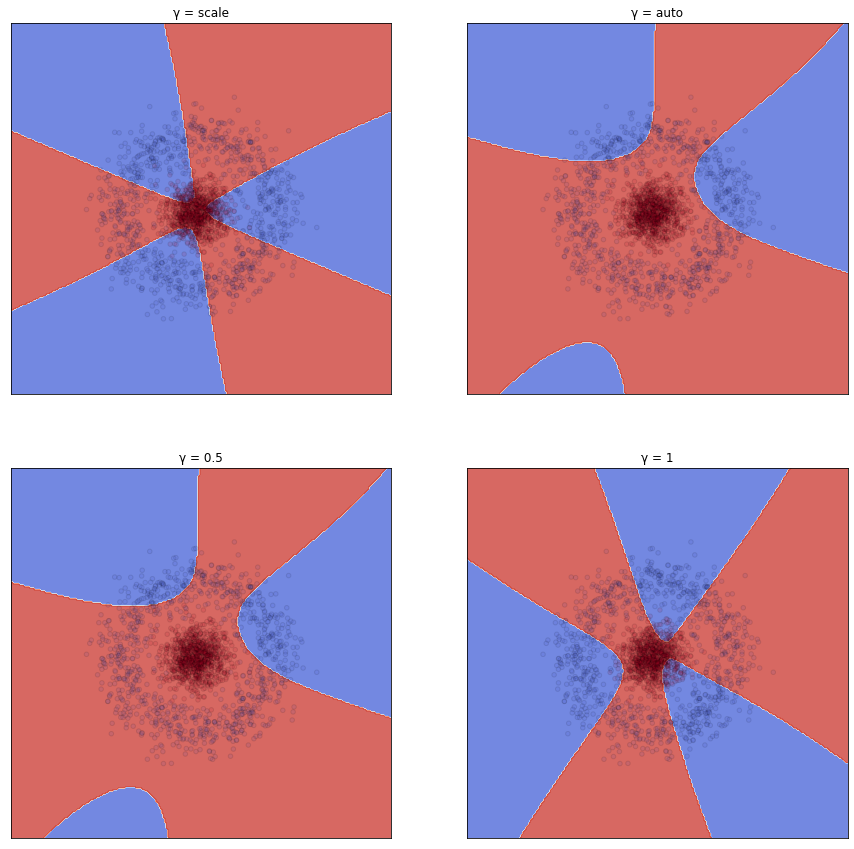

accurracy when γ = scale: 0.6025
accurracy when γ = auto: 0.625
accurracy when γ = 0.5: 0.625
accurracy when γ = 1: 0.668


In [27]:
accuracy_gamma = {}
models = (SVC(kernel='sigmoid', gamma='scale'),
          SVC(kernel='sigmoid', gamma='auto'),
          SVC(kernel='sigmoid', gamma=0.5),
          SVC(kernel='sigmoid', gamma=1))
models = (clf.fit(X, y) for clf in models)
titles = ('γ = scale', 'γ = auto', 'γ = 0.5', 'γ = 1')


fig, sub = plt.subplots(2, 2, figsize=(15,15))
X0, X1 = X[:, 0], X[:, 1]
xx, yy = make_meshgrid(X0, X1)
for clf, title, ax in zip(models, titles, sub.flatten()):
    plot_contours(ax, clf, xx, yy,
                  cmap=plt.cm.coolwarm, alpha=0.8)
    accuracy_gamma[title] = accuracy_score(y, clf.predict(X))
    ax.scatter(X0, X1, c=y, cmap=plt.cm.coolwarm, s=20, edgecolors='k', alpha=0.1)
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xticks(())
    ax.set_yticks(())
    ax.set_title(title)

plt.show()

for key in accuracy_gamma:
    print('accurracy when {}: {}'.format(key, accuracy_gamma[key]))

In [15]:
from sklearn.model_selection import GridSearchCV, cross_val_score, KFold
kfold = KFold(n_splits=4, shuffle=True, random_state=2021)
sigmoid_params = {"C": [0.08, 0.1, 0.15, 0.25, 0.5],
                  "gamma": ['auto', 0.1, 0.25, 0.5, 0.75, 1]}
gs_sigmoid = GridSearchCV(SVC(kernel='sigmoid'), sigmoid_params, scoring='accuracy', cv=kfold, n_jobs=-1)
gs_sigmoid.fit(X, y)
gs_sigmoid.best_params_

{'C': 0.5, 'gamma': 1}

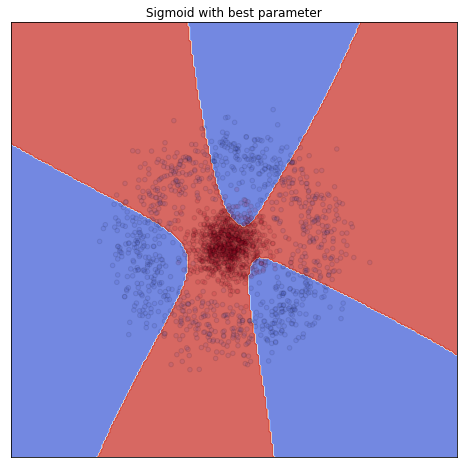

accuracy with best paramter: 0.6985


In [30]:
plt.figure(figsize=(8, 8))
X0, X1 = X[:, 0], X[:, 1]
xx, yy = make_meshgrid(X0, X1)

Z = gs_sigmoid.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)

plt.scatter(X0, X1, c=y, cmap=plt.cm.coolwarm, s=20, edgecolors='k', alpha=0.1)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xticks(())
plt.yticks(())
plt.title('Sigmoid with best parameter')
plt.show()

print('accuracy with best paramter: {}'.format(accuracy_score(y, gs_sigmoid.predict(X))))

SVM의 기본 매개변수인 C도 있으므로 총 2개의 매개변수를 설정해줘야한다. 그렇다면 gamma의 역할은 무엇일까? gamma는 하나의 데이터 샘플이 영향력을 행사하는 거리를 결정한다. gamma는 가우시안 함수의 표준편차와 관련되어 있는데, 클수록 작은 표준편차를 갖는다. 즉, gamma가 클수록 한 데이터 포인터들이 영향력을 행사하는 거리가 짧아지는 반면, gamma가 낮을수록 커진다. gamma의 크기에 따른 가우시안 함수의 모양은 그림8에서 확인하자. 

그림 9를 보면서 gamma와 C의 영향에 대해서 마지막으로 생각해보자. 오른쪽으로 갈수록 gamma가 커지고, 아래 쪽으로 내려갈수록 C가 커지는 형국이다. 

우선 C부터 살펴보면, C가 커질수록 이상치의 존재 가능성을 낮게 본다고 이전에 설명했다. gamma가 10으로 동일한 첫번째 열을 보자. C=1인 상황에서는 두 개의 이상치를 인정하고 무난하게 결정 경계를 찾은 반면, C=100일 때는 하나의 이상치만 인정하면서 조금은 억지스럽게 분류해냈다. 이번에는 gamma의 영향을 살펴보자. C가 1로 동일하게 세팅되어 있는 첫번째 행을 왼쪽에서부터 오른쪽으로 보면 gamma가 점점 커지는데, 결정 경계가 결정 경계 가까이에 있는 데이터 샘플들에 영향을 크게 받기 때문에 점점 더 구불구불해지는 것을 알 수 있다. 즉, gamma 매개변수는 결정 경계의 곡률을 조정한다고 말할 수도 있다. gamma의 값이 높아짐에 따라 파란색의 공간이 점점 작아졌는데, 위에서 언급한 것과 같이 각각의 데이터 포인터가 영향력을 행사하는 거리가 짧아졌기 때문이다. 매개변수 C와 마찬가지로 너무 낮으면 과소적합될 가능성이 크고, 너무 높으면 과대적합의 위험이 있다. 따라서 두 파라미터 모두 적정값을 찾아야하는 것이 우리 사용자들의 숙제이다. 

훈련 데이터를 과하게 학습하면 구불구불한 괴상한 decision boundary가 만들어집니다. 이는 올바른 decision boundary가 아닙니다. 직선으로 된 decision boundary가 더 적합하겠죠? Kerenl, C, Gamma 모두 오버피팅에 영향을 줄 수 있는 파라미터입니다. C와 Gamma를 지나치게 높게 잡는다면 오버피팅이 될 수 있습니다. 운동도 과하게 하면 오버트레이닝이 되어 근손실이 있을 수 있듯이, 머신러닝에서도 성능을 높히는 것과 오버피팅을 막는 것 사이의 균형을 잘 지켜야 합니다. 